In [1]:
import os
from pathlib import Path
os.chdir(os.path.join(Path(os.path.abspath('')).parent.resolve()))
print(os.getcwd())

import sys
sys.path.append(os.path.dirname(os.path.realpath(Path(os.path.abspath('')).parent.resolve())))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/dhm/workspace/conference_projects/MICCAI2022_AKF_feature_importance


In [2]:
def plot_performance_score(score, result_tab, x=[0,6,12]):
    fig, ax = plt.subplots(2, 7, figsize=(16, 5), sharey=True, sharex=True)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)

    for mi, model in enumerate(model_list):
        for ii, imp in enumerate(['zero', 'mean']):
            for ri, rr in enumerate([5, 30, 60]):
                y = result_tab.iloc[(index_model == model) & 
                                    (index_imp == imp) &
                                    (index_rr == rr)][score]
                x = [0, 6, 12]
                if mi > 1:
                    ax[ii][mi].plot(x, y, label=f'{rr}min')
                if mi == 6:
                    ax[ii][mi].legend(loc='lower right');
                if mi <= 1 and ri == 0:
                    ax[ii][mi].plot(x, y)
                ax[ii][mi].set_title(f'{model} - {imp}')
                if ii == 1:
                    ax[ii][mi].set_xlabel('prediction interval [h]')
                if mi == 0:
                    ax[ii][mi].set_label(f'{score}')
                    
    return fig

(0.8941176470588236, 0.10196078431372549, 0.10980392156862745, 1.0)

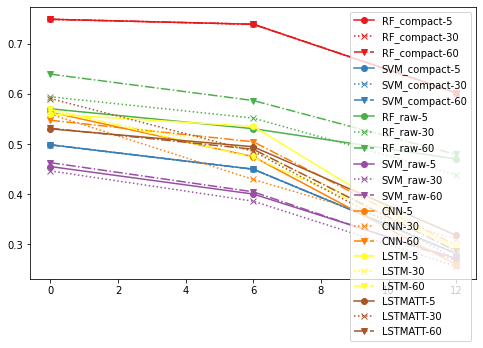

In [27]:
fig, ax = plt.subplots(figsize=(8, 5),)
cmap = plt.get_cmap("Set1")
markers = ['o', 'x', 'v',]
lines = ['solid', 'dotted', 'dashdot']

for mi, model in enumerate(model_list):
    for ii, imp in enumerate(['zero']):
        for ri, rr in enumerate([5, 30, 60]):
            y = result_tab.iloc[(index_model == model) & 
                                (index_imp == imp) &
                                (index_rr == rr)][score]
            x = [0, 6, 12]
            ax.plot(x, y, c=cmap(mi), linestyle=lines[ri], marker=markers[ri],
                    label=f'{model}-{rr}')
plt.legend()

In [3]:
rf_result_processed_folder = 'models/RF/model_performance_processed'
svm_result_processed_folder = 'models/SVM/model_performance_processed'
rf_result_raw_folder = 'models/RF/model_performance_raw'
svm_result_raw_folder = 'models/SVM/model_performance_raw'
cnn_result_folder = 'models/Conv1D_torch/model_performance'
lstm_result_folder = 'models/LSTM_torch/model_performance'
lstmatt_result_folder = 'models/LSTMATT_torch/model_performance'

model_list = ['RF_compact', 'SVM_compact', 'RF_raw', 'SVM_raw', 'CNN', 'LSTM', 'LSTMATT']
result_list = [rf_result_processed_folder, svm_result_processed_folder, 
               rf_result_raw_folder, svm_result_raw_folder, 
               cnn_result_folder, lstm_result_folder, lstmatt_result_folder]

index = ['AUROC', 'Recall', 'Precision', 'F1','Accuracy', 'Loss']
result_tab = pd.DataFrame(index=index)

for model, result_folder in zip(model_list, result_list):
    for imp in ['zero', 'mean']:
        for rr in [5, 30, 60]:
            for pred in [0, 6, 12]:
                try:
                    result = pd.read_csv(os.path.join(result_folder, f'{pred}-{imp}-{rr}.csv'), 
                                         sep=';', header=0, index_col=0).transpose()
                except:
                    result = pd.read_csv(os.path.join(result_folder, f'{pred}-{imp}-None.csv'), 
                                         sep=';', header=0, index_col=0).transpose()
                result.index = index
                result_tab[(model, pred, imp, rr)] = result[result.columns[0]]
                
result_tab.columns = pd.MultiIndex.from_tuples(result_tab.columns, names=['model', 'pred', 'imp', 'rr'])
result_tab = result_tab.T

index_model = result_tab.index.get_level_values('model')
index_pred = result_tab.index.get_level_values('pred')
index_imp = result_tab.index.get_level_values('imp')
index_rr = result_tab.index.get_level_values('rr')

In [4]:
result_tab.iloc[(index_imp == 'zero') &
                (index_model == 'CNN')]

AUROC    Recall  Precision        F1  Accuracy  \
model pred imp  rr                                                      
CNN   0    zero 5   0.875409  0.760962   0.564116  0.639992  0.815620   
      6    zero 5   0.866553  0.756763   0.475167  0.576388  0.802765   
      12   zero 5   0.844777  0.812519   0.259305  0.384025  0.725292   
      0    zero 30  0.882460  0.770095   0.560225  0.641561  0.815339   
      6    zero 30  0.882192  0.847434   0.429628  0.562283  0.765186   
      12   zero 30  0.864103  0.782223   0.310475  0.433524  0.783758   
      0    zero 60  0.879380  0.771084   0.547893  0.633560  0.808819   
      6    zero 60  0.879749  0.751462   0.504894  0.595369  0.818797   
      12   zero 60  0.862219  0.801391   0.297728  0.423917  0.770383   

                        Loss  
model pred imp  rr            
CNN   0    zero 5   0.411774  
      6    zero 5   0.413485  
      12   zero 5   0.511329  
      0    zero 30  0.410341  
      6    zero 30  0.476371  
      12   zero 30  0.426586  
      0    zero 60  0.415784  
      6    zero 60  0.396325  
      12   zero 60  0.461506

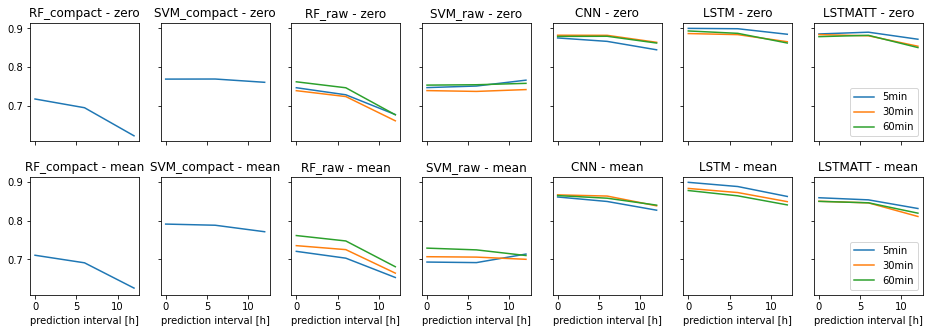

In [5]:
plot_performance_score('AUROC', result_tab);

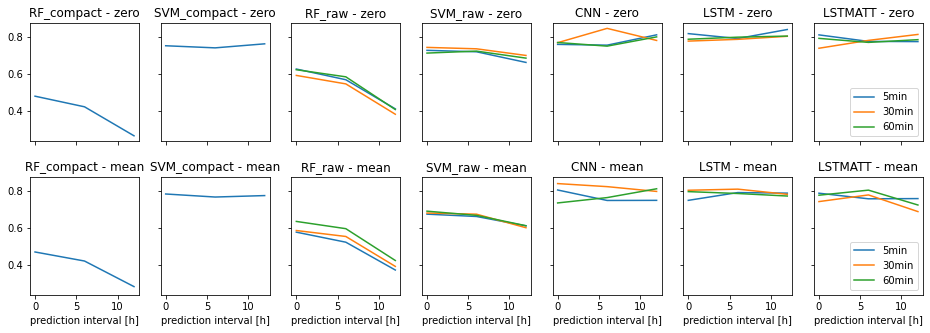

In [6]:
plot_performance_score('Recall', result_tab);

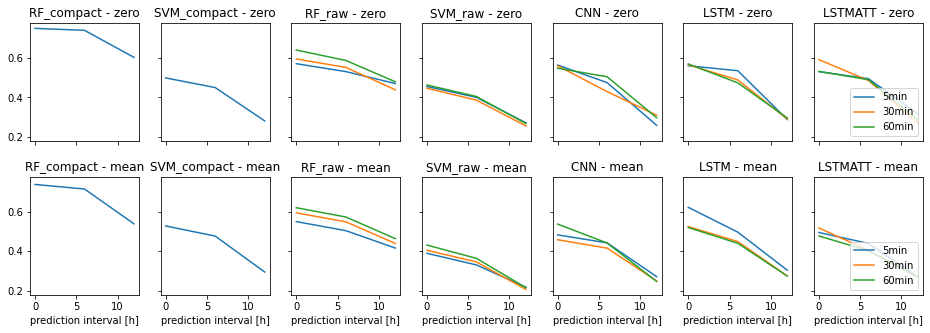

In [7]:
plot_performance_score('Precision', result_tab);

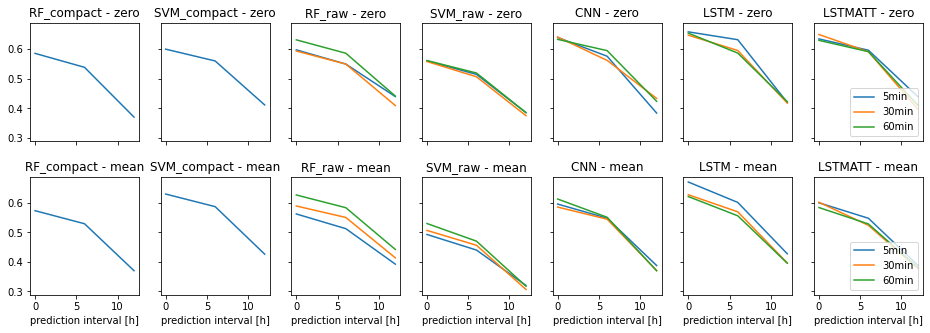

In [8]:
plot_performance_score('F1', result_tab);

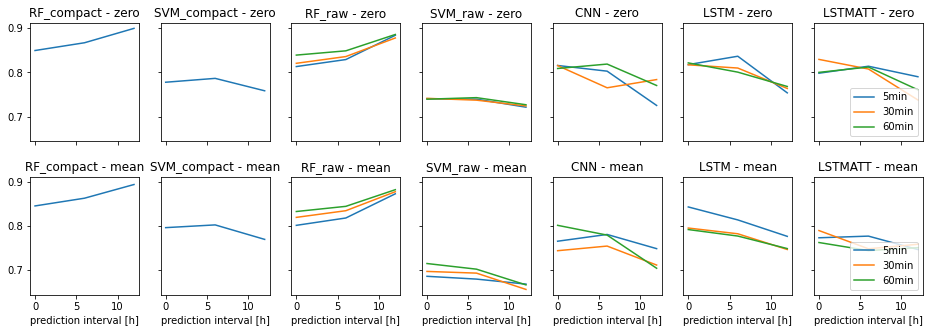

In [9]:
plot_performance_score('Accuracy', result_tab);

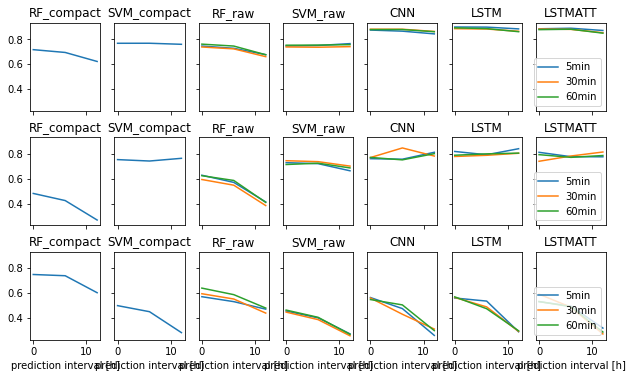

In [14]:
fig, ax = plt.subplots(3, 7, figsize=(16, 5), sharey=True, sharex=True)
plt.subplots_adjust(left=0, bottom=0, right=0, top=0, wspace=0, hspace=0.3)

imp = 'zero'
for mi, model in enumerate(model_list):
    for si, score in enumerate(['AUROC', 'Recall', 'Precision']):
        for ri, rr in enumerate([5, 30, 60]):
            y = result_tab.iloc[(index_model == model) & 
                                (index_imp == imp) &
                                (index_rr == rr)][score]
            x = [0, 6, 12]
            if mi > 1:
                ax[si][mi].plot(x, y, label=f'{rr}min')
            if mi == 6:
                ax[si][mi].legend(loc='lower right');
            if mi <= 1 and ri == 0:
                ax[si][mi].plot(x, y)
            ax[si][mi].set_title(f'{model}')
            if si == 2:
                ax[si][mi].set_xlabel('prediction interval [h]')
            if mi == 0:
                ax[si][mi].set_label(f'{score}')